In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('medical_examination.csv')
df.sample(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
36481,52110,19894,1,154,79.0,120,80,2,1,0,0,1,1
36912,52747,22611,1,157,100.0,120,80,2,1,0,0,1,1
58066,82858,22525,1,157,102.0,120,80,1,1,0,0,1,1
56560,80730,19633,1,154,64.0,120,80,1,1,0,0,0,0
38830,55433,19810,2,170,110.0,140,80,2,1,0,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [17]:
# проверяем соответствие значений в столбцах 0 и 1. BEST
df['gender'].unique()

array([2, 1, 3], dtype=int64)

In [5]:

df['cholesterol'].values

array([1, 3, 3, ..., 3, 1, 2], dtype=int64)

In [7]:
# добавление столбца "избыточный вес". Рассчитайте его ИМТ, разделив вес в килограммах на квадрат роста в метрах. Если значение> 25, значит, у человека избыточный вес.
df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2) > 25

In [19]:
df.columns.tolist()

['id',
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio',
 'overweight']

In [8]:
# нормализуем df, приводим значения в колонках к 0 и 1
medical = { 1: 0, 2: 1, 3: 1}
df['gluc'] = df['gluc'].map(medical)
df['cholesterol'] = df['cholesterol'].map(medical)

In [50]:
# Создаем DF для графика, используя pd.melt()
df_cardio = pd.melt(frame = df, value_vars=['cholesterol', 'gluc', 'alco', 'active', 'smoke', 'overweight'], id_vars=['cardio'])
# Ггруппируем данные, разделяем их по кардио
df_cardio = pd.DataFrame(df_cardio.groupby(['variable', 'value', 'cardio'])['value'].count()).rename(columns={'value': 'Total'}).reset_index()

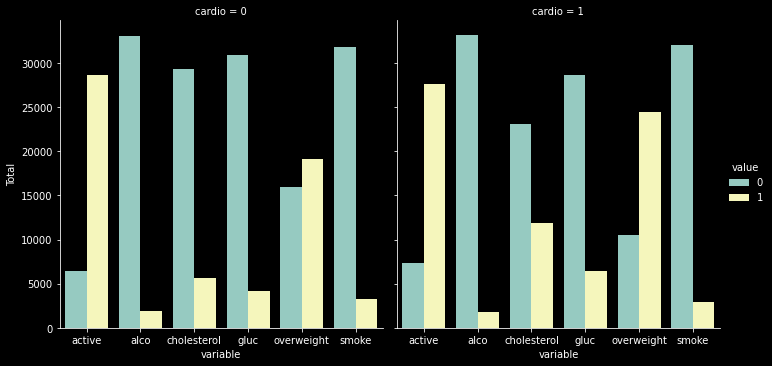

In [51]:
sns.catplot(x='variable', y='Total', data=df_cardio, hue='value', col='cardio', kind='bar')

In [23]:
# очистка DF от значений за пределами перцентиле. Которые не влияют на анализ данных
df_heat = df[
    (df.ap_lo <= df.ap_hi) &
    (df.height >= df.height.quantile(0.025)) &
    (df.height <= df.height.quantile(0.975)) &
    (df.weight >= df.weight.quantile(0.0025)) &
    (df.weight <= df.weight.quantile(0.975))
    ]
#corr =df_heat.corr()

In [26]:
# маскируем верхний треугольник матрицы
disquise = np.zeros_like(df_heat.corr(), dtype=np.bool)
disquise[np.triu_indices_from(disquise)] = True

<AxesSubplot:>

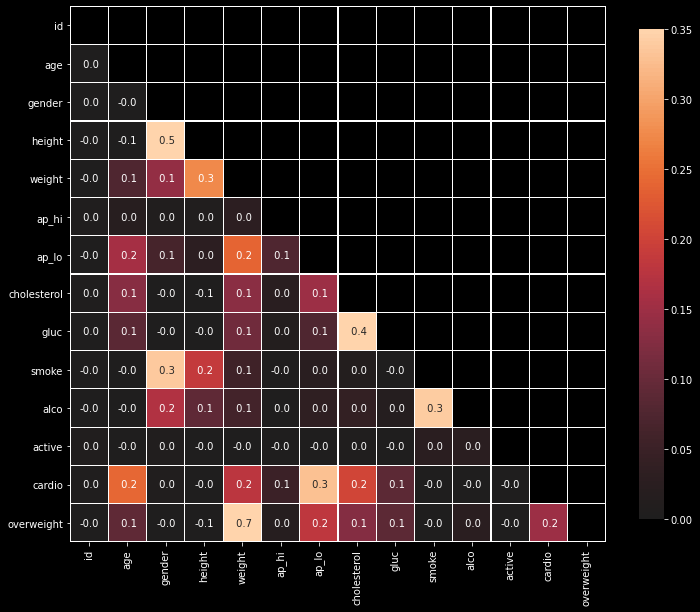

In [44]:
# создает heatmap
plt.figure(figsize=(12, 15))
sns.heatmap(df_heat.corr(), annot=True, fmt=' .1f', mask=disquise, vmin=.0, vmax=.35, center=0, square=True, linewidths=.2, cbar_kws={'shrink' :.60, 'format': '%.2f'})